In [1]:
#Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv file
df=pd.read_csv("/Users/lavanyamaheshwari/Downloads/CarPrices/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking for null values
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
df=df.dropna()
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
categorical_features = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 
                        'enginetype', 'cylindernumber', 'fuelsystem']
numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 
                      'carheight', 'curbweight', 'enginesize', 'boreratio']
target = 'price'
# Convert categorical data to numerical (Manual One-Hot Encoding)
for feature in categorical_features:
    unique_vals = df[feature].unique()  # Get unique categories
    for val in unique_vals:
        df[f"{feature}_{val}"] = (df[feature] == val).astype(int)  # Create binary columns
    df.drop(columns=[feature], inplace=True)  # Drop original categorical column

# Define final feature list (all numerical + encoded categorical)
features = numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]

# Convert to NumPy arrays
X = df[features].values
y = df[target].values.reshape(-1, 1)  # Convert price column to column vector

In [9]:
# Manual normalization (Standardization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std  # Normalize features

# Add bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones

In [29]:
# Initialize parameters (theta) to zero
theta = np.zeros((X.shape[1], 1))

# Set hyperparameters
learning_rate = 0.01  # Alpha
num_iterations = 1000  # Number of iterations
m = len(y)  # Number of training samples

# Gradient Descent Implementation
cost_history = []  # To track cost function values

for i in range(num_iterations):
    y_pred = X @ theta  # Compute predictions
    error = y_pred - y  # Compute error
    gradient = (1/m) * (X.T @ error)  # Compute gradient
    theta -= learning_rate * gradient  # Update theta
    
    # Compute cost function (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

# Print final model parameters
print("Intercept:", theta[0][0])
print("Coefficients:", theta[1:].flatten())

Intercept: 13276.137398574858
Coefficients: [  457.09782375    31.66387733   196.64250917  1016.50162729
   378.18218834  1512.42275006  2477.01414607   -37.43126633
   101.18374818  -101.18374818  -453.0625074    453.0625074
   708.03550491  -278.4309785    206.18200713  -360.84369727
   143.98198348   623.40960332  -444.47521519  -400.88569758
  -408.21841534 -1550.51855116   757.08338349  -338.32550982
   187.27570339   821.65552049  -372.45800864 -1648.38712264
  1063.89863502  -129.89963604   252.9856868    604.19456459
   187.27570339  1875.24004821   194.74894502    -3.95729815
  -197.78503491   252.29649467  -108.60016411  -204.99841823
  -101.18374818  -371.22835768]


In [30]:
# Predict on training data
y_pred = X @ theta

# Display actual vs predicted values
comparison = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
print(comparison.head())


    Actual     Predicted
0  13495.0  13800.447366
1  16500.0  13800.447366
2  16500.0  14428.878600
3  13950.0  11087.624510
4  17450.0  16528.831945


In [31]:
# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y - y_pred))

# Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 1763.4997930464147
MSE: 6021858.99116048
RMSE: 2453.9476341520576


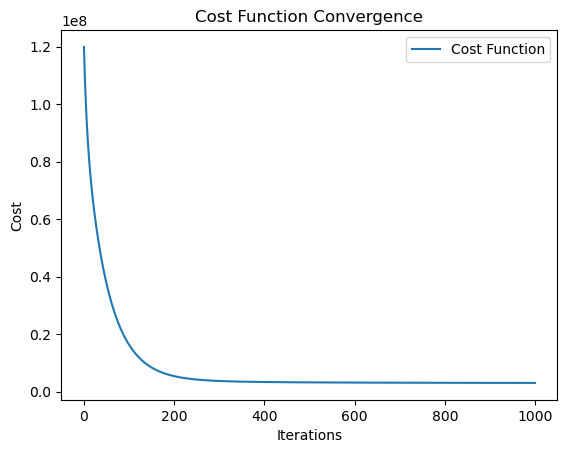

In [32]:
import matplotlib.pyplot as plt

plt.plot(range(num_iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()


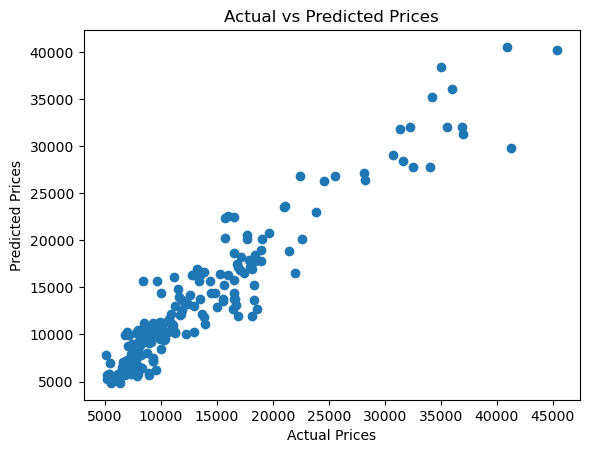

In [33]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
